In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import feature

In [2]:
from keras.models import load_model
model = load_model('home_security_lbp.h5')

Using TensorFlow backend.


In [3]:
person = ['Dinesh: ', 'Anvesh: ', 'Ankush: ', 'Chaitanya: ', 'Unknown: ']
font = cv2.FONT_HERSHEY_DUPLEX
faces_cas = cv2.CascadeClassifier('./haar_cascade.xml')

In [ ]:

cap = cv2.VideoCapture(0)
i = 0
ret= True
while ret == True:
    ret, img = cap.read()
    if ret == False:
        cap.release()
        cv2.destroyAllWindows()
        break
        
    i += 1
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbh = feature.local_binary_pattern(gray,11*3,3)
    #gray1 = cv2.imread('./home_database/img'+str(i)+'.png',0)
    
    
    faces = faces_cas.detectMultiScale(gray,1.3,8)
    
    for x, y , w , h in faces:
        
        fac = lbh[y:y+h, x:x+w]
        cv2.imwrite('./home_database/img'+str(i)+'.png',fac)
        lbh1 = cv2.imread('./home_database/img'+str(i)+'.png',0)
        roi = lbh1
        roi = cv2.resize(roi,(64,64))
        roi = roi.astype('float32')
        test = roi.reshape((1,1,64,64)) / 255
        out = model.predict(test)
        percent = str(int(out[0][out.argmax()] * 100))
        if int(out[0][out.argmax()] * 100) > 75:
            name = person[int(out.argmax())]
            colour =  (0,255,0)
            
            if name == 'Unknown: ':
                colour = (0,0,255)

        else:
            name = 'Unknown: '
            colour = (0,0,255)
            
        cv2.rectangle(img,(x,y),(x+w,y+w),(0,255,255),1)
        cv2.rectangle(img,(x,y), (x+w,y+20),colour, -1)
        cv2.putText(img, name +percent+'%',(x, y+20), font, 0.6, (255, 255, 255), 1)
        
        
    cv2.imshow('windows', img)
    cv2.imshow('gray',lbh)
    if cv2.waitKey(41) ==27:
        break
        

cap.release()
cv2.destroyAllWindows()

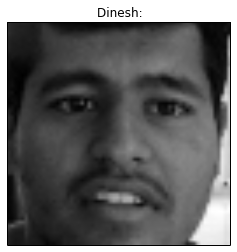

In [15]:
image_path = '../training/DataBase/s1/img_1.png'
image = cv2.imread(image_path,0)
plt.imshow(image,cmap = 'gray')
roi = image.astype('float32')
test = roi.reshape((1,1,64,64)) / 255
out = model.predict(test)
plt.title(person[out.argmax()])
plt.xticks([]), plt.yticks([])
plt.show()

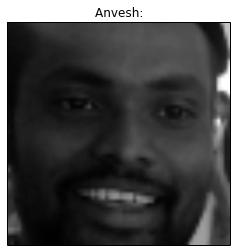

In [16]:
image_path = '../training/DataBase/s2/anvesh_100.png'
image = cv2.imread(image_path,0)
plt.imshow(image,cmap = 'gray')
roi = image.astype('float32')
test = roi.reshape((1,1,64,64)) / 255
out = model.predict(test)
plt.title(person[out.argmax()])
plt.xticks([]), plt.yticks([])
plt.show()

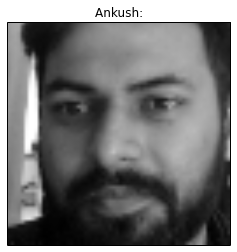

In [17]:
image_path = '../training/DataBase/s3/ankush_1025.png'
image = cv2.imread(image_path,0)
plt.imshow(image,cmap = 'gray')
roi = image.astype('float32')
test = roi.reshape((1,1,64,64)) / 255
out = model.predict(test)
plt.title(person[out.argmax()])
plt.xticks([]), plt.yticks([])
plt.show()

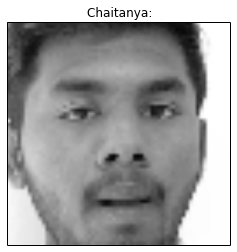

In [18]:
image_path = '../training/DataBase/s4/img_1006.png'
image = cv2.imread(image_path,0)
plt.imshow(image,cmap = 'gray')
roi = image.astype('float32')
test = roi.reshape((1,1,64,64)) / 255
out = model.predict(test)
plt.title(person[out.argmax()])
plt.xticks([]), plt.yticks([])
plt.show()